In [1]:
from datetime import datetime, timedelta

import biosppy as bp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

from ltbio.biosignals import modalities, Event
from ltbio.biosignals.modalities import ACC
from ltbio.biosignals.sources.BitalinoShort import BitalinoShort
from ltbio.processing.filters import TimeDomainFilter, ConvolutionOperation


In [3]:

path_ = 'G:\\PreEpiSeizures\\Patients_HEM\\FCSFDM\\Bitalino'
options = {'date1': datetime(2021, 4, 15, 14, 45, 49),
           'date2': datetime(2021, 4, 15, 14, 49, 32)}
data = BitalinoShort._read(dir=path_, type=modalities.ACC, **options)

In [4]:
acc_ = ACC(path_, BitalinoShort, **options)

In [5]:
acc = np.vstack((data['ACCX_chest'], data['ACCY_chest'], data['ACCZ_chest']))

In [6]:
acc_ = ACC(path_, BitalinoShort, **options)
filter_aux = TimeDomainFilter(ConvolutionOperation.HANN, window_length=timedelta(seconds=7))
filter_data = acc_['ACCX_chest'].filter(filter_aux)
filter_data = acc_['ACCY_chest'].filter(filter_aux)
filter_data = acc_['ACCZ_chest'].filter(filter_aux)


In [7]:
norm_x = (acc_['ACCX_chest'][:].to_array() - np.mean(acc_['ACCX_chest'][:].to_array()))/ np.std(acc_['ACCY_chest'][:].to_array())
norm_y = (acc_['ACCY_chest'][:].to_array() - np.mean(acc_['ACCY_chest'][:].to_array()))/ np.std(acc_['ACCY_chest'][:].to_array())
norm_z = (acc_['ACCZ_chest'][:].to_array() - np.mean(acc_['ACCZ_chest'][:].to_array()))/ np.std(acc_['ACCY_chest'][:].to_array())

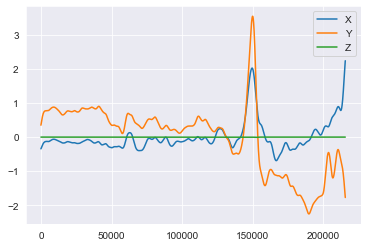

In [8]:

plt.plot(norm_x, label='X')
plt.plot(norm_y, label='Y')
plt.plot(norm_z, label='Z')
plt.legend()

In [9]:
event1 = Event('crise 4', datetime(2021, 4, 15, 14, 47, 32))

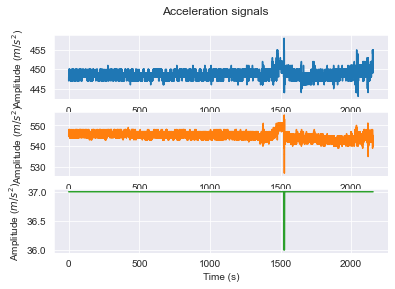

In [10]:
acc_info = bp.signals.acc.acc(acc.T)

In [11]:
acc_magnitude = np.sqrt(np.square(acc_['ACCX_chest'][:]) + np.square(acc_['ACCY_chest'][:]) + np.square(acc_['ACCZ_chest'][:])).T

In [12]:
acc_magnitude_norm = np.sqrt(np.square(norm_x) + np.square(norm_y) + np.square(norm_z)).T

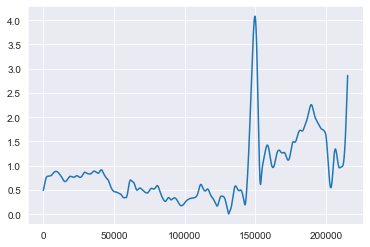

In [13]:
plt.plot(acc_magnitude_norm.T)

In [38]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
colors = {'lightblue': '#A9D1ED', 'lightorange': '#F8CBAD',  'darkblue': '#003399','blackblue': '#00264d','onset': '#843C0C', 'teal':'teal', 'green': '#9CCC78', 'blue': '#007991', 'brick': '#C05746', 'yellow': '#FFAC63'}

color_x = colors['lightblue']
color_y = colors['blackblue']
color_z = colors['teal']
color_mag = colors['lightblue']
legend_elements = [Line2D([0], [0], color=color_x, lw=3, label='X'),
                   Line2D([0], [0], color=color_y, lw=3, label='Y'),
                   Line2D([0], [0], color=color_z, lw=3, label='Z'),
                   Line2D([0], [0], color='grey', lw=3, label='preictal', linestyle='dashed'),
                   Line2D([0], [0], color='grey', lw=3, label='ictal'),

                   Line2D([0], [0], color=colors['onset'], lw=3, label='onset'),
                   ]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


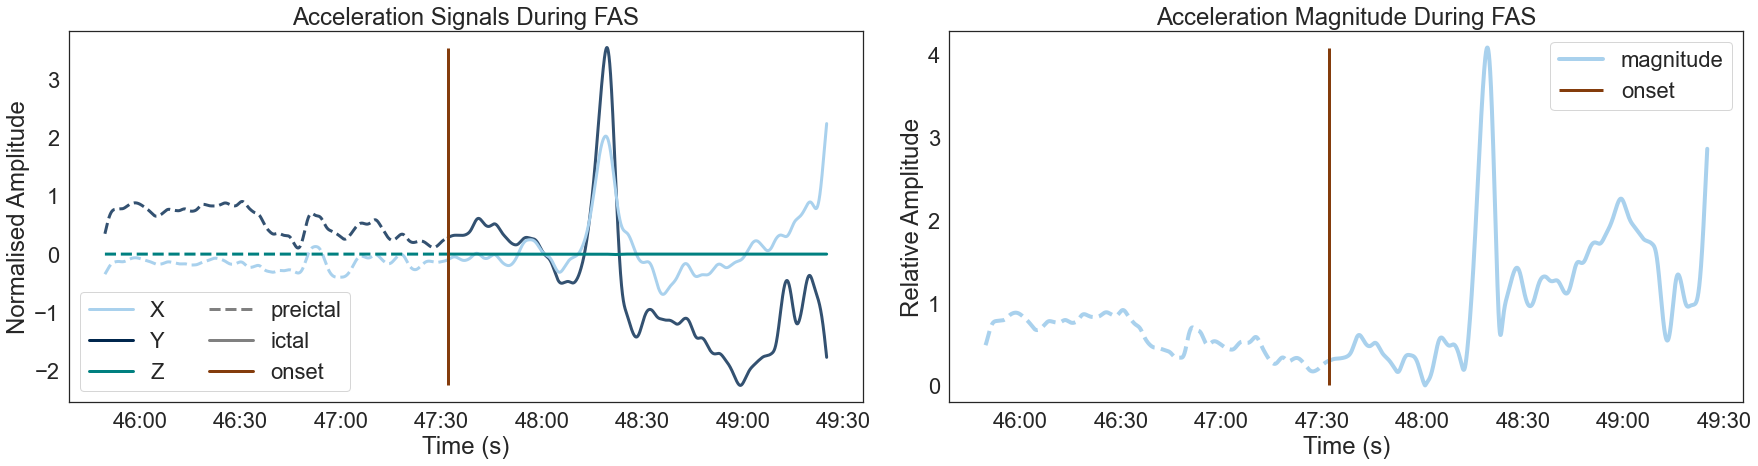

In [39]:
sb.set(font_scale=2)
sb.set_style(style='white')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 7))
#colors = {'lightblue': '#A9D1ED', 'lightorange': '#F8CBAD',  'darkblue': '#003399', 'onset': '#843C0C', 'teal':'teal', }
# plt.title('Respiratory Rate During Seizure')
ax2.set_ylabel('Relative Amplitude')
ax2.set_xlabel('Time (s)')
ax1.set_ylabel('Normalised Amplitude')
ax1.set_xlabel('Time (s)')
ax2.set_title('Acceleration Magnitude During FAS')
ax1.set_title('Acceleration Signals During FAS')


x_axis = pd.date_range(acc_.initial_datetime, acc_.final_datetime, periods=len(acc_['ACCX_chest'][:]))
ax2.plot(x_axis[x_axis <= event1.onset], acc_magnitude_norm[:len(x_axis[x_axis <= event1.onset])], linewidth=4,
         color=color_mag, linestyle='dashed')

ax1.plot(x_axis[x_axis <= event1.onset], norm_y[:len(x_axis[x_axis <= event1.onset])], linewidth=3,
         color=color_y, linestyle='dashed', alpha=0.8)
ax1.plot(x_axis[x_axis <= event1.onset], norm_x[:len(x_axis[x_axis <= event1.onset])], linewidth=3,
         color=color_x, linestyle='dashed')
ax1.plot(x_axis[x_axis <= event1.onset], norm_z[:len(x_axis[x_axis <= event1.onset])], linewidth=3,
         color=color_z, linestyle='dashed')


ax1.plot(x_axis[x_axis >= event1.onset], norm_y[-len(x_axis[x_axis >= event1.onset]):], linewidth=3, color=color_y, label='ictal Y', alpha=0.8)
ax1.plot(x_axis[x_axis >= event1.onset], norm_x[-len(x_axis[x_axis >= event1.onset]):], linewidth=3, color=color_x, label='ictal X')
ax1.plot(x_axis[x_axis >= event1.onset], norm_z[-len(x_axis[x_axis >= event1.onset]):], linewidth=3, color=color_z, label='ictal Z')
ax2.plot(x_axis[x_axis >= event1.onset], acc_magnitude_norm[-len(x_axis[x_axis >= event1.onset]):], linewidth=4, color=color_mag, label='magnitude')


from matplotlib.dates import DateFormatter
ax1.vlines(event1.onset, np.max(norm_y), np.min(norm_y), color= colors['onset'], label='Seizure Onset', linewidth=3)
ax2.vlines(event1.onset, np.max(acc_magnitude_norm), np.min(acc_magnitude_norm), color= colors['onset'], label='onset', linewidth=3)

ax1.xaxis.set_major_formatter(DateFormatter('%M:%S'))
ax2.xaxis.set_major_formatter(DateFormatter('%M:%S'))


ax1.legend(handles=legend_elements, loc='lower left', ncol=2)

ax2.legend()
plt.tight_layout()
figname = 'C:\\Users\\Mariana\\Documents\\CAT\\images\\acc_during_seizure_c'
plt.savefig(figname + '.png')
plt.savefig(figname + '.eps', format='eps')
plt.show()
